<a href="https://colab.research.google.com/github/Shalini-Kanakapur/Deep_Learning_Basic_Tasks/blob/main/task1_cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch 
import torchvision

In [ ]:
#defining hyperparamters
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [ ]:
#visualization
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [ ]:
example_data.shape

torch.Size([1000, 1, 28, 28])

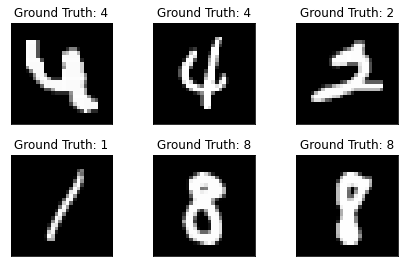

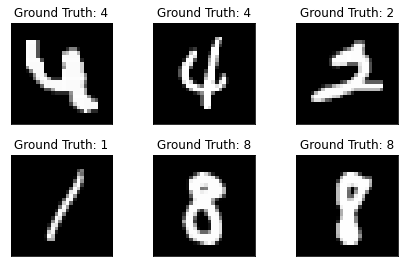

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(1,n_epochs + 1)]

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      FILE1="/content/drive/My Drive/sem6_cvg/model.pth"
      FILE2="/content/drive/My Drive/sem6_cvg/optimizer.pth"
      torch.save(network.state_dict(),FILE1 )
      torch.save(optimizer.state_dict(),FILE2 )

In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
#test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.360404
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.293759
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.299630
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.292107
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.288941
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.232685
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.240712
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.219678
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.192156
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.116445
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.046255
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.886514
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.685285
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.817174
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.772289
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.439202
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.326942
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.201637
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.954666
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.102051
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.1876, Accuracy: 9429/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.525997
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.502792
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.382614
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.230077
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.583110
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.336350
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.516475
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.332352
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.415983
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.678749
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.429956
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.349758
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.587880
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.287363
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.490634
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.500473
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.272645
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.600605
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.412818
Train Epoch: 2 [12160

In [ ]:
print(test_counter,test_losses)

[60000, 120000, 180000] [0.1875594985961914, 0.1197376838684082, 0.09753825149536133]


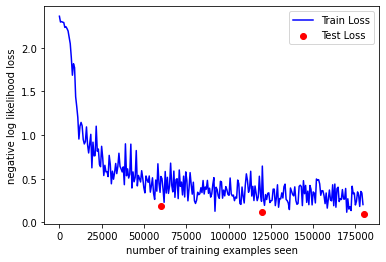

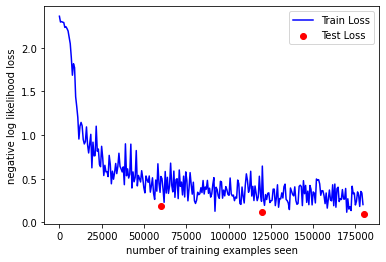

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [ ]:
with torch.no_grad():
  output = network(example_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


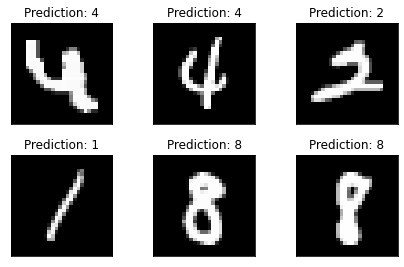

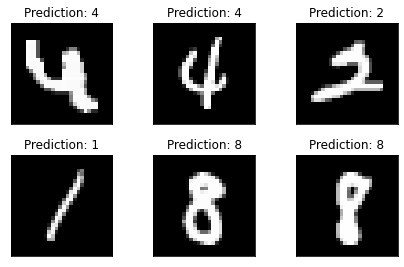

In [ ]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)

In [ ]:
FILE1="/content/drive/My Drive/sem6_cvg/model.pth"
FILE2="/content/drive/My Drive/sem6_cvg/optimizer.pth"

network_state_dict = torch.load(FILE1)
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load(FILE2)
continued_optimizer.load_state_dict(optimizer_state_dict)

In [ ]:
for i in range(4,100):
  test_counter.append(i*len(train_loader.dataset))
  train(i)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 4 [0/60000 (0%)]	Loss: 0.277518
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.328223
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.282794
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.246819
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.231753
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.621862
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.157519
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.177019
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.200504
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.216169
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.170936
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.144451
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.425320
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.175831
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.125168
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.158666
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.541811
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.259712
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.772466
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.266036
Train Epoch: 4 [12800/60000 (

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Streaming output truncated to the last 5000 lines.
Train Epoch: 48 [28160/60000 (47%)]	Loss: 0.116680
Train Epoch: 48 [28800/60000 (48%)]	Loss: 0.070564
Train Epoch: 48 [29440/60000 (49%)]	Loss: 0.087792
Train Epoch: 48 [30080/60000 (50%)]	Loss: 0.067070
Train Epoch: 48 [30720/60000 (51%)]	Loss: 0.034230
Train Epoch: 48 [31360/60000 (52%)]	Loss: 0.019421
Train Epoch: 48 [32000/60000 (53%)]	Loss: 0.201900
Train Epoch: 48 [32640/60000 (54%)]	Loss: 0.024998
Train Epoch: 48 [33280/60000 (55%)]	Loss: 0.114990
Train Epoch: 48 [33920/60000 (57%)]	Loss: 0.099102
Train Epoch: 48 [34560/60000 (58%)]	Loss: 0.071418
Train Epoch: 48 [35200/60000 (59%)]	Loss: 0.072768
Train Epoch: 48 [35840/60000 (60%)]	Loss: 0.130526
Train Epoch: 48 [36480/60000 (61%)]	Loss: 0.170678
Train Epoch: 48 [37120/60000 (62%)]	Loss: 0.047985
Train Epoch: 48 [37760/60000 (63%)]	Loss: 0.113609
Train Epoch: 48 [38400/60000 (64%)]	Loss: 0.089592
Train Epoch: 48 [39040/60000 (65%)]	Loss: 0.057168
Train Epoch: 48 [39680/60000 (6

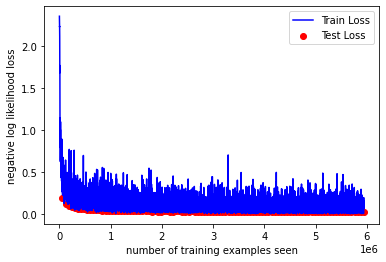

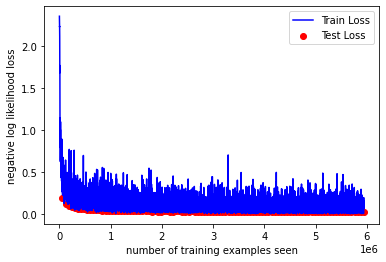

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig